In [60]:
%pylab inline
style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [117]:
from lmfit import minimize, Parameters
def residual(params, x, data=None, eps_data=1,mode='res'):
    a_hyp =  params['a_hyp']
    a_sin =  params['a_sin']
    sh_hyp = params['shift_hyp']
    sh_sin = params['shift_sin']
    power =  params['power_hyp']
    free =   params['free']

    model =  free + a_hyp/((-x+sh_hyp)**power) + a_sin*sin(-x+sh_sin)
    if mode == 'res':
        return (data-model)/eps_data
    elif mode == 'calc':
        return model
    
params = Parameters()
params.add('a_hyp', value = 1)
params.add('a_sin', value = 1.5)
params.add('shift_hyp', value = 2.3)
params.add('shift_sin', value = 1.3)
params.add('power_hyp', value = 5)
params.add('free', value = -0.7)

In [65]:
x = linspace
data = []
with open('delays.txt','r') as f:
    data = map(float, f.readlines()[1].split())

In [67]:
eps_data = 1

In [68]:
out = minimize(residual, params, args=(x, data, eps_data))


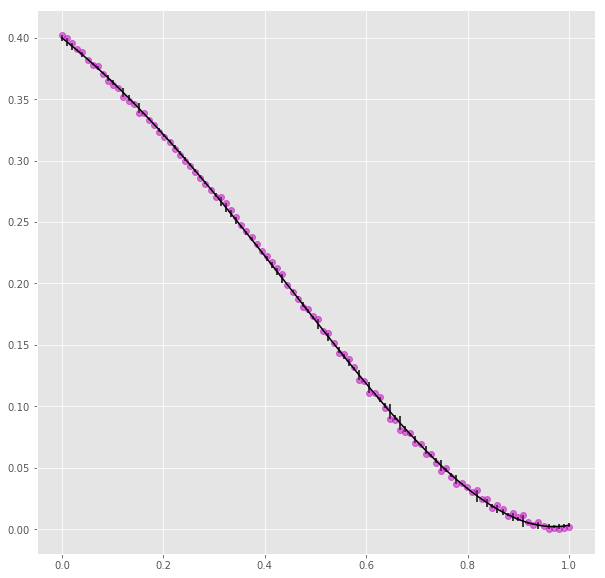

In [131]:
figure(figsize=(10,10))
errorbar(x,
         residual(out.params,x,mode='calc'), 
         yerr=residual(out.params,x,data=data,mode='res'),
         color='k')
plot(x,data,'mo', alpha=0.5)

## Nice fit!

In [109]:
for i in out.params.items():
    print i[0] + ' ========= %.2f'%i[1].value

a_hyp ========= 11168.18
a_sin ========= 1.09
shift_hyp ========= 4.45
shift_sin ========= 1.16
power_hyp ========= 8.09
free ========= -0.66
